Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 1

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [X] Choose your target. Which column in your tabular dataset will you predict?
- [X] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [X] Determine whether your problem is regression or classification.
- [X] Choose your evaluation metric.
- [X] Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.
- [X] Begin to clean and explore your data.
- [X] Choose which features, if any, to exclude. Would some features "leak" information from the future?

## Reading
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)

In [1]:
# Load the data so we can use it
import pandas as pd
bitcoin = pd.read_csv('Historical data for Bitcoin.csv')
bitcoin.head(10)

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,8/12/2019,11528.19,11528.19,11320.95,11382.62,1.364720e+10,2.034410e+11
1,8/11/2019,11349.74,11523.58,11248.29,11523.58,1.577437e+10,2.059420e+11
2,8/10/2019,11861.56,11915.66,11323.90,11354.02,1.812536e+10,2.028900e+11
3,8/9/2019,11953.47,11970.46,11709.75,11862.94,1.833999e+10,2.119610e+11
4,8/8/2019,11954.04,11979.42,11556.17,11966.41,1.948159e+10,2.137880e+11
5,8/7/2019,11476.19,12036.99,11433.70,11941.97,2.219499e+10,2.133300e+11
6,8/6/2019,11811.55,12273.82,11290.73,11478.17,2.363511e+10,2.050230e+11
7,8/5/2019,10960.74,11895.09,10960.74,11805.65,2.387599e+10,2.108490e+11
8,8/4/2019,10821.63,11009.21,10620.28,10970.18,1.653089e+10,1.959080e+11
9,8/3/2019,10519.28,10946.78,10503.50,10821.73,1.535269e+10,1.932340e+11


In [2]:
bitcoin.dtypes

Date           object
Open*         float64
High          float64
Low           float64
Close**       float64
Volume        float64
Market Cap    float64
dtype: object

In [3]:
from tqdm import tnrange
# A little bit of feature engineering

bitcoin['numeric_date'] = bitcoin['Date'].copy()

bitcoin['avg_daily_price'] = (bitcoin['Open*']+bitcoin['High']+bitcoin['Low']+bitcoin['Close**'])/4

bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
bitcoin['Year'] = bitcoin['Date'].dt.year

bitcoin['Previous higher?'] = ""

for i in tnrange(len(bitcoin)-1,0,-1):
    if(i>0):
        bitcoin['Previous higher?'][i-1] = bitcoin['Low'][i].copy() > bitcoin['Low'][i-1].copy()
    bitcoin['Previous higher?'][2297] = False

C:\Users\Samue\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Samue\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [5]:
new_columns = {True: 1, False:0}
bitcoin['Previous higher?'] = [new_columns[item] for item in bitcoin['Previous higher?']]

In [6]:
train = bitcoin[bitcoin.Year < 2016]
val = bitcoin[(bitcoin.Year >2015) & (bitcoin.Year < 2018)]
test = bitcoin[bitcoin.Year > 2017]

In [7]:
# Get the X and y parts for train, val, and test
drop_columns = ['Previous higher?','Date','numeric_date']
target = 'Previous higher?'
X_train = train.drop(columns=drop_columns)
y_train = train[target]
X_val = val.drop(columns=drop_columns)
y_val = val[target]
X_test = test.drop(columns=drop_columns)

This is a classification problem.

In [8]:
accuracy = y_train.value_counts(normalize=True)[0]
print('Accuracy is', accuracy)

Accuracy is 0.5715746421267893


In [9]:
bitcoin.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap,numeric_date,avg_daily_price,Year,Previous higher?
0,2019-08-12,11528.19,11528.19,11320.95,11382.62,1.364720e+10,2.034410e+11,8/12/2019,11439.9875,2019,0
1,2019-08-11,11349.74,11523.58,11248.29,11523.58,1.577437e+10,2.059420e+11,8/11/2019,11411.2975,2019,1
2,2019-08-10,11861.56,11915.66,11323.90,11354.02,1.812536e+10,2.028900e+11,8/10/2019,11613.7850,2019,1
3,2019-08-09,11953.47,11970.46,11709.75,11862.94,1.833999e+10,2.119610e+11,8/9/2019,11874.1550,2019,0
4,2019-08-08,11954.04,11979.42,11556.17,11966.41,1.948159e+10,2.137880e+11,8/8/2019,11864.0100,2019,0


Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [X] Plot the distribution of your target. 
    - Regression problem: Is your target skewed? Then, log-transform it.
    - Classification: Are your classes imbalanced? Then, don't use just accuracy. And try `class_balance` parameter in scikit-learn.
- [X] Continue to clean and explore your data. Make exploratory visualizations.
- [X] Fit a model. Does it beat your baseline?
- [ ] Share at least 1 visualization on Slack.

You need to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

### Today
- [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)
- [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/)
- [Machine Learning Meets Economics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)


### Yesterday
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)

In [10]:
import seaborn as sns
y = bitcoin['Close**']
sns.distplot(y)

In [11]:
import numpy as np
y_log = np.log1p(y)
bitcoin['log(Bitcoin Close)'] = y_log

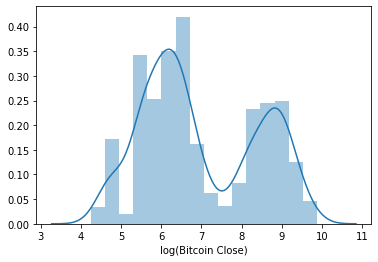

In [12]:
sns.distplot(bitcoin['log(Bitcoin Close)']);

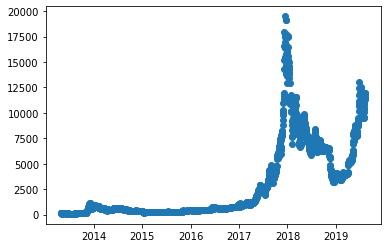

In [13]:
import matplotlib.pyplot as plt
import matplotlib

dates = matplotlib.dates.date2num(bitcoin['Date'])
plt.plot_date(dates, bitcoin['Close**']);

In [14]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

In [15]:
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.6922024623803009


In [ ]:
bitcoin.dtypes

In [ ]:
bitcoin.head(10)